In [1]:
# !pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lendo .csv e Limpando arquivos

In [2]:
df = pd.read_csv('cure_a_princesa.csv')
df_limpo = df.dropna()
df_limpo

,Escama de basilisco,Chifre de minotauro,Garra de grifo,Lagrimas de sereia,Chifre de unicornio,Sangue de dragao,Tinta de kraken,Presa de quimera,Curada
0,36.029450,0.000215,0.000000,51.301451,98.475831,0.000000,31.876522,0.000000,1.0
1,0.142011,0.000000,0.000000,86.192848,110.657183,0.000000,26.563352,0.000000,1.0
2,0.000000,0.000000,0.000000,58.997889,106.974170,0.000000,44.446142,0.000000,1.0
3,10.212648,0.000763,0.000000,25.137057,123.896557,15.334352,25.426722,0.000000,1.0
4,0.000000,0.000541,0.000000,37.748252,95.997993,7.859290,22.946361,0.000000,1.0
...,...,...,...,...,...,...,...,...,...
992,110.679264,0.000000,1.735729,85.660042,50.782199,112.197870,56.100251,16.038704,0.0
993,75.140771,0.000489,0.000000,25.412170,51.020304,91.091657,50.074378,2.869862,0.0
997,115.814404,0.000000,0.000000,14.058381,49.764027,101.625768,57.296759,16.154416,0.0
998,92.882797,0.000000,0.000000,29.452958,55.142430,99.544549,54.794372,4.518010,0.0


# Aplicando Mascara para trazer apenas os curados

In [9]:
maskToCurada = df_limpo["Curada"] == 1
df_limpo_mask = df_limpo[maskToCurada]
df_limpo_mask.describe()

,Escama de basilisco,Chifre de minotauro,Garra de grifo,Lagrimas de sereia,Chifre de unicornio,Sangue de dragao,Tinta de kraken,Presa de quimera,Curada
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.0,389.0
mean,43.438976,0.000413,0.377738,50.043191,99.334295,25.844809,29.939085,0.0,1.0
std,37.620714,0.000572,0.572244,27.137508,9.957367,26.229894,4.971432,0.0,0.0
min,0.000000,0.000000,0.000000,0.026700,62.861520,0.000000,17.871250,0.0,1.0
25%,4.432077,0.000000,0.000000,28.510447,93.447388,0.000000,26.287016,0.0,1.0
50%,32.368788,0.000000,0.000000,50.293127,98.683366,7.859290,29.610661,0.0,1.0
75%,80.406171,0.000758,0.569293,71.480024,106.045119,50.754156,33.556002,0.0,1.0
max,107.548607,0.003044,2.806742,99.034048,126.675826,83.440006,45.594735,0.0,1.0


### A partir do describe ja podemos concluir que a PRESA DE QUIMERA é o ingrediente tóxico devido estar zerado em tudo

 

In [19]:
df_final01 = df_limpo_mask[['Escama de basilisco', 'Lagrimas de sereia', 'Chifre de unicornio', 'Sangue de dragao', 'Tinta de kraken']]
df_final01.describe()

,Escama de basilisco,Lagrimas de sereia,Chifre de unicornio,Sangue de dragao,Tinta de kraken
count,389.000000,389.000000,389.000000,389.000000,389.000000
mean,43.438976,50.043191,99.334295,25.844809,29.939085
std,37.620714,27.137508,9.957367,26.229894,4.971432
min,0.000000,0.026700,62.861520,0.000000,17.871250
25%,4.432077,28.510447,93.447388,0.000000,26.287016
50%,32.368788,50.293127,98.683366,7.859290,29.610661
75%,80.406171,71.480024,106.045119,50.754156,33.556002
max,107.548607,99.034048,126.675826,83.440006,45.594735


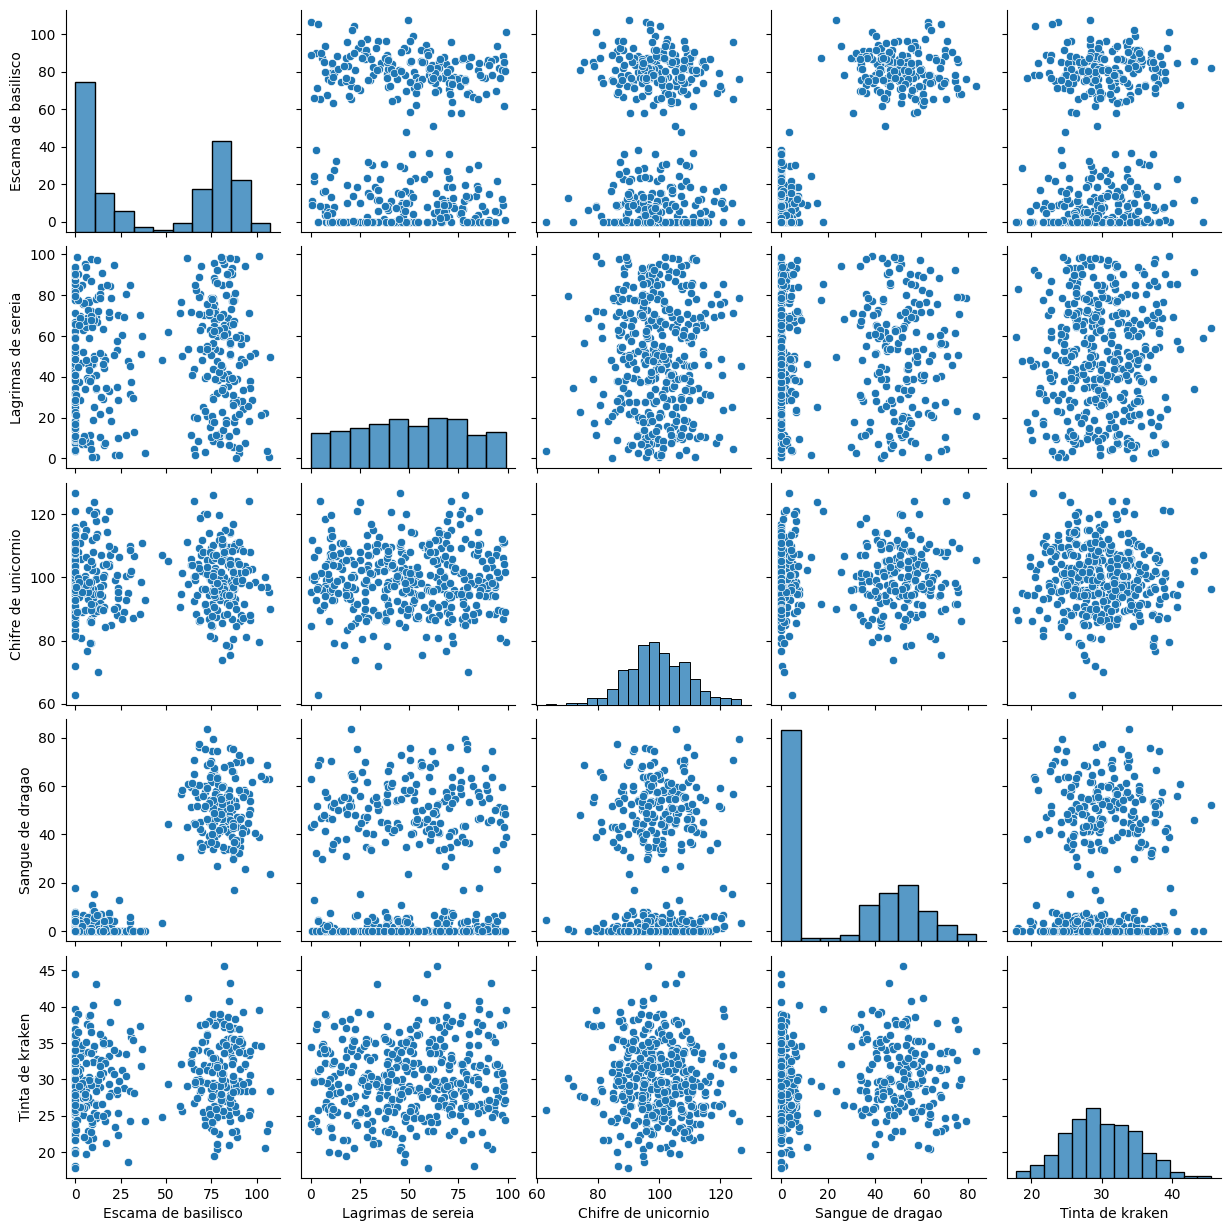

In [20]:
sns.pairplot(df_final01)

In [21]:
df_final01.corr()

,Escama de basilisco,Lagrimas de sereia,Chifre de unicornio,Sangue de dragao,Tinta de kraken
Escama de basilisco,1.000000,-0.004964,0.008711,0.905213,0.122668
Lagrimas de sereia,-0.004964,1.000000,-0.014925,0.022461,0.058748
Chifre de unicornio,0.008711,-0.014925,1.000000,0.047700,-0.038866
Sangue de dragao,0.905213,0.022461,0.047700,1.000000,0.087679
Tinta de kraken,0.122668,0.058748,-0.038866,0.087679,1.000000


### No corr do df, podemos enxergar alguns dados relevantes de relação, na primeira linha vemos que a Escama de Basilisco possui uma relação quase de 1 (0.905) com o Sangue de dragão, e uma outra relação, que por mais que baixa mas relevante considerando as outras relações, seria com a tinta de kraken com um valor de 0.122.
 

<Axes: >

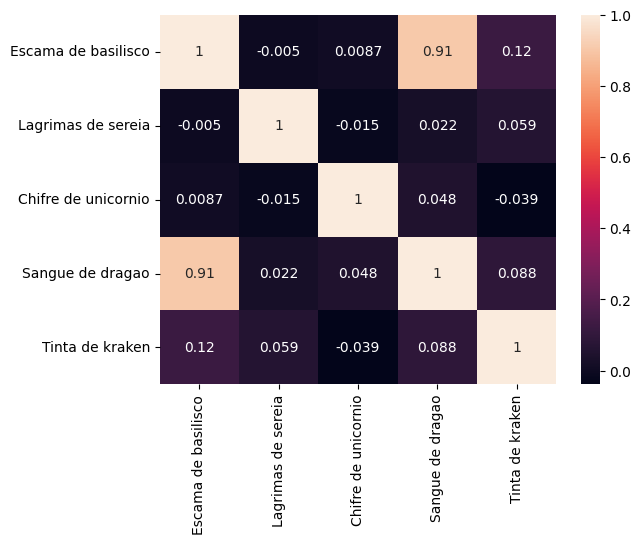

In [24]:
sns.heatmap(df_final01.corr(), annot=True)

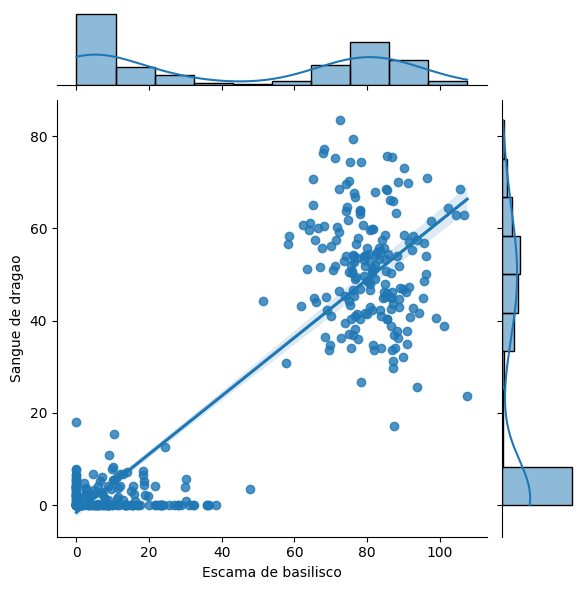

In [25]:
sns.jointplot(x='Escama de basilisco', y='Sangue de dragao', data=df_final01, kind= 'reg')

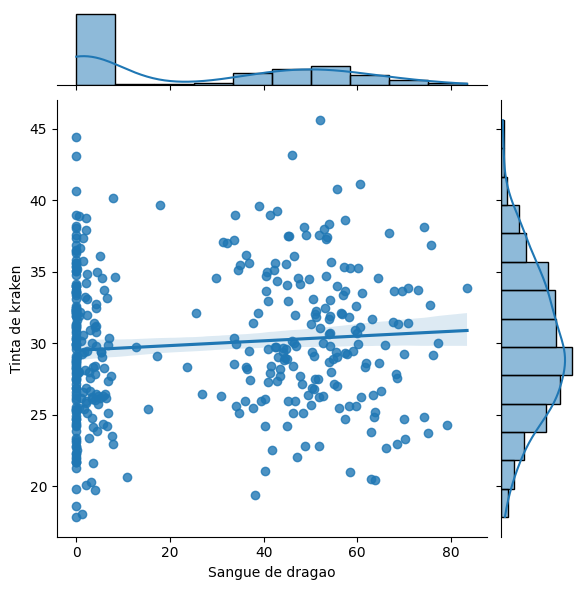

In [27]:
sns.jointplot(x='Sangue de dragao', y='Tinta de kraken', data=df_final01, kind= 'reg')

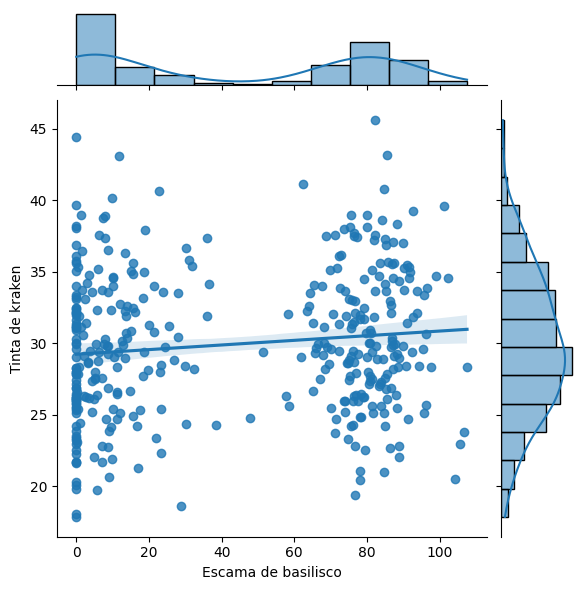

In [28]:
sns.jointplot(x='Escama de basilisco', y='Tinta de kraken', data=df_final01, kind= 'reg')

In [29]:
df_final01[['Escama de basilisco', 'Tinta de kraken', 'Sangue de dragao']].describe()

,Escama de basilisco,Tinta de kraken,Sangue de dragao
count,389.000000,389.000000,389.000000
mean,43.438976,29.939085,25.844809
std,37.620714,4.971432,26.229894
min,0.000000,17.871250,0.000000
25%,4.432077,26.287016,0.000000
50%,32.368788,29.610661,7.859290
75%,80.406171,33.556002,50.754156
max,107.548607,45.594735,83.440006
